In [1]:
from matplotlib.pyplot import *
import numpy as np
from tqdm import tqdm

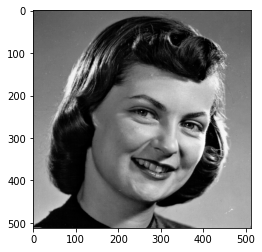

In [2]:
im = imread ('../data/imgs/girlface.jpg')

imshow (im, cmap = 'gray')

In [3]:
def gaussian (im, mean = 0, sigma = 25) :
    return im + np.random.normal (mean, sigma, np.shape (im))

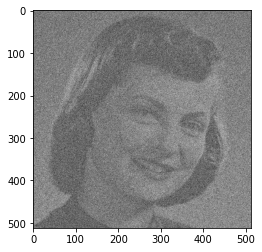

In [6]:
imshow (gaussian (im, sigma = 100), cmap = 'gray')

In [7]:
def grad (P) :
    a, b = np.shape (P)[0:2]

    Px = np.zeros ((a,b))
    Py = np.zeros ((a,b))

    for i in range (a) :
        for j in range (b) :
            if i < a-1 :
                Px [i,j] = P [i+1,j] - P [i,j]
            elif i == a-1 :
                Px[i,j] = 0

            if j < b-1 :
                Py [i,j] = P [i,j+1] - P [i,j]
            elif j == b-1 :
                Py [i,j] = 0

    return Px, Py

def div (P) :
    a, b = np.shape (P)[1:3]

    Px = np.zeros ((a,b))
    Py = np.zeros ((a,b))

    for i in range (a) :
        for j in range (b) :
            if 0 < i < a-1 :
                Px [i,j] = P [0,i,j] - P [0,i-1,j]
            elif i == 0 :
                Px [i,j] = P [0,i,j]
            elif i == a-1 :
                Px [i,j] = - P [0,i-1,j]

            if 0 < j < a-1 :
                Py [i,j] = P [1,i,j] - P [1,i,j-1]
            elif j == 0 :
                Py [i,j] = P [1,i,j]
            elif j == b-1 :
                Py [i,j] = - P [1,i,j-1]

    return Px + Py

def hessian (H) :
    a, b = np.shape (H)

    H11 = np.zeros ((a,b))
    H12 = np.zeros ((a,b))
    H21 = np.zeros ((a,b))
    H22 = np.zeros ((a,b))

    for i in range (a) :
        for j in range (b) :
            if 0 < i < a-1 :
                H11 [i,j] = H[i+1,j] - 2 * H[i,j] + H[i-1,j]
            elif i == 0 :
                H11 [i,j] = H[i+1,j] - H[i,j]
            elif i == a-1 :
                H11 [i,j] = H[i-1,j] - H[i,j]

            if 0 < i <= a-1 and 0 <= j < b-1 :
                H12 [i,j] = H[i,j+1] - H[i,j] - H[i-1,j+1] + H[i-1,j]
            elif i == 0 or i == a-1 :
                H12 [i,j] = 0

            if 0 <= i < a-1 and 0 < j <= b-1 :
                H21 [i,j] = H[i+1,j] - H[i,j] - H[i+1,j-1] + H[i,j-1]
            elif i == 0 or i == a-1 :
                H21 [i,j] = 0

            if 0 < j < b-1 :
                H22 [i,j] = H[i,j+1] - 2 * H[i,j] + H[i,j-1]
            elif j == 0 :
                H22 [i,j] = H[i,j+1] - H[i,j]
            elif j == b-1 :
                H22 [i,j] = H[i,j-1] - H[i,j]

    return H11, H12, H21, H22

def hessian_adjoint (H) :
    a, b = np.shape (H)[1:3]

    H11 = np.zeros ((a,b))
    H12 = np.zeros ((a,b))
    H21 = np.zeros ((a,b))
    H22 = np.zeros ((a,b))

    for i in range (a) :
        for j in range (b) :
            if 0 < i < a-1 :
                H11 [i,j] = H[0,i-1,j] - 2 * H[0,i,j] + H[0,i+1,j]
            elif i == 0 :
                H11 [i,j] = H[0,i+1,j] - H[0,i,j]
            elif i == b-1 :
                H11 [i,j] = H[0,i-1,j] - H[0,i,j]

            if 0 < j < b-1 :
                H22 [i,j] = H[3,i,j-1] - 2 * H[3,i,j] + H[3,i,j+1]
            elif j == 0 :
                H22 [i,j] = H[3,i,j+1] - H[3,i,j]
            elif j == b-1 :
                H22 [i,j] = H[3,i,j-1] - H[3,i,j]

            if 0 < j < b-1 :
                if 0 < i < a-1 :
                    H12 [i,j] = H[1,i,j-1] - H[1,i,j] - H[1,i+1,j-1] + H[1,i+1,j]
                elif i == 0 :
                    H12 [i,j] = H[1,i+1,j] - H[1,i+1,j-1]
                elif i == a-1 :
                    H12 [i,j] = H[1,i,j-1] - H[1,i,j]
            if 0 < i < a-1 :
                if j == 0 :
                    H12 [i,j] = H[1,i+1,j] - H[1,i,j]
                elif j == b-1 :
                    H12 [i,j] = H[1,i,j-1] - H[1,i+1,j-1]
            if i == 0 :
                if j == 0 :
                    H12 [i,j] = H[1,i+1,j]
                elif j == b-1 :
                    H12 [i,j] = - H[1,i+1,j-1]
            if i == a-1 :
                if j == 0 :
                    H12 [i,j] = - H[1,i,j]
                elif j == b-1 :
                    H12 [i,j] = - H[1,i,j-1]

            if 0 < j < b-1 :
                if 0 < i < a-1 :
                    H21 [i,j] = H[2,i-1,j] - H[2,i,j] - H[2,i-1,j+1] + H[2,i,j+1]
                elif i == 0 :
                    H21 [i,j] = H[2,i,j+1] - H[2,i,j]
                elif i == a-1 :
                    H21 [i,j] = H[2,i-1,j] - H[2,i-1,j+1]

            if 0 < i < a-1 :
                if j == 0 :
                    H21 [i,j] = H[2,i,j+1] - H[2,i-1,j+1]
                elif j == b-1 :
                    H21 [i,j] = H[2,i-1,j] - H[2,i,j]

            if i == 0 :
                if j == 0 :
                    H21 [i,j] = H[2,i,j+1]
                elif j == b-1 :
                    H21 [i,j] = - H[2,i,j]

            if i == a-1 :
                if j == 0 :
                    H21 [i,j] = - H[2,i-1,j+1]
                elif j == b-1 :
                    H21 [i,j] = H[2,i-1,j]

    return H11 + H12 + H22 + H21


In [8]:
def norm_in_X (u) :
    return np.sqrt (sum (np.power (u,2)))

def norm_in_Rn (u) :
    return np.sqrt (sum (np.power (u,2)))

def PSNR (u) :
    
    mse = np.mean (np.power ((im - u), 2))
    if not mse :
        return 100
    
    PIXEL_MAX = 255.
    
    return 20 * np.log10 (PIXEL_MAX / np.sqrt(mse))

In [9]:
def chambolle1 (im, mean = 0, sigma = 50, epsilon = 1e-2, L = 20,
                    tau = 0.20, max_iter = 10) :

#     im : Noisy image

    g = im

    old_p = np.zeros (np.shape ((g,g)))

    RET = g

#     P = []

    for i in tqdm (range (max_iter), ascii = True) :

        gd = grad (div(old_p) - np.divide (g, L))
        norm_gd = norm_in_Rn (gd)

        new_p = np.divide (old_p + np.dot (tau,gd) , 1 + np.dot (tau, norm_gd))

        old_p = new_p

        RET = g - L * div (new_p)

#         P.append (PSNR (RET))

    return RET

In [10]:
def chambolle2 (im, mean = 0, sigma = 50, epsilon = 1e-2, L = 20,
                    tau = 0.20, max_iter = 10) :

    g = im
    
    old_p = np.zeros (np.shape ((g,g,g,g)))

    RET = g

    for i in tqdm (range (max_iter), ascii = True) :
        gd = hessian (hessian_adjoint(old_p) - np.divide (g, L))
        norm_gd = norm_in_Rn (gd)

        new_p = np.divide (old_p - np.dot (tau,gd) , 1 + tau*norm_gd)

        old_p = new_p

        RET = g - L * hessian_adjoint (new_p)

    return RET

In [11]:
noisy_image = gaussian (im, sigma = 50)

100%|#################################################################################| 10/10 [29:05<00:00, 174.60s/it]


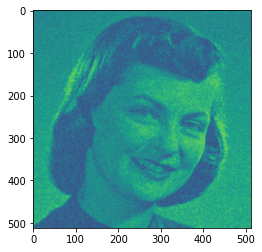

In [12]:
imshow(chambolle1(noisy_image, max_iter=10))

In [ ]:
# imshow (noisy_image, cmap = 'gray')
# imshow (denoised, cmap = 'gray')

In [ ]:
imshow (im, cmap = 'gray')

In [ ]:
S = np.linspace (5, 200, 10, dtype = int)

def TEST (im, L = 15) :
    P0 = []
    P1 = []
    P2 = []

    # The less is PSNR, the bigger is the noise.

    for s in S :
        noisy  = gaussian (im, sigma = s)

        denoised1 = chambolle1 (noisy, sigma = s, max_iter = 10, L = L)
        P1.append  (PSNR (denoised1))

#         denoised2 = chambolle2 (noisy, sigma = s, max_iter = 20, L = 15)    
#         P2.append  (PSNR (denoised2))

        P0.append (PSNR (noisy))

    return P0, P1, P2

In [ ]:
# CHAMBOLLE 1
# Lambda is constant
# 20 iterations

figure(figsize=(8, 6), dpi=80)
P0, P1, P2 = TEST (im)

with style.context(['science']) :
    grid (True)    
    plot (S, P1, label = 'denoised')
    plot (S, P0, label  = 'noisy')

legend(title = 'PSNR-CHAM1-L-CONST', loc='best')
savefig ('PSNR-CHAM1-L-CONST.jpg', dpi = 300)

In [ ]:
# CHAMBOLLE 2
# Lambda is constant
# 20 iterations

figure(figsize=(8, 6), dpi=80)
P0, P1, P2 = TEST (im)

with style.context(['science']) :
    grid (True)    
    plot (S, P2, label = 'denoised')
    plot (S, P0, label  = 'noisy')
    
legend(title = 'PSNR-CHAM2-L-CONST', loc = 'best')
savefig ('PSNR-CHAM2-L-CONST.jpg', dpi = 300)

In [ ]:
A, B = 1, 3
LAMBDA = np.linspace (1, 60, A*B)

In [ ]:
# CHAMBOLLE 1
# Here, we change the value of Lambda
fig, ax = subplots(A, B, sharex='col', sharey='row')

fig.set_figheight(15)
fig.set_figwidth(15)

k = 0
for i in range (A) :
    for j in range (B) :
        label = '$\lambda$ = ' + str(LAMBDA [k])
        
        P0, P1, P2 = TEST (im, LAMBDA [k])
        
        ax [j].plot (S,P1, label = label)
        ax [j].plot (S,P0, label = 'noisy')
        ax [j].legend (loc = 'best')
        
        k += 1
fig
savefig ('PSNR-CHAM1-L.jpg', dpi = 300)

In [ ]:
# CHAMBOLLE 2
# Here, we change the value of Lambda
fig, ax = subplots(A, B, sharex='col', sharey='row')

k = 0
for i in range (A) :
    P0, P1, P2 = TEST (im, LAMBDA [k])
    for j in range (B) :
        ax [i,j].plot (S,P2, label = 'denoised $\lambda = $' + LAMBDA [k])
        ax [i,j].plot (S,P0, label = 'noisy')
        ax [i,j].legend (loc = 'best')
        
        k += 1

fig
savefig ('PSNR-CHAM2-L.jpg', dpi = 300)

In [ ]:
# CHAMBOLLE 1
fig, ax = subplots(A, B, sharex='col', sharey='row')

k = 0
for i in range (A) :
    for j in range (B) :
        denoised = chambolle1 (noisy, sigma = 20, max_iter = 30, L = 15)        
        ax [i,j].imshow (denoised1, cmap = 'gray')
        
        k += 1

fig
savefig ('PSNR-CHAM1-L.jpg', dpi = 300)

